In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('Salary.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head(10)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
5,AssocProf,B,6,6,Male,97000
6,Prof,B,30,23,Male,175000
7,Prof,B,45,45,Male,147765
8,Prof,B,21,20,Male,119250
9,Prof,B,18,18,Female,129000


In [7]:
df.tail(10)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
387,Prof,A,29,15,Male,109305
388,Prof,A,38,36,Male,119450
389,Prof,A,33,18,Male,186023
390,Prof,A,40,19,Male,166605
391,Prof,A,30,19,Male,151292
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [8]:
df.sample(5)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
258,AsstProf,A,9,3,Male,73800
22,Prof,A,34,30,Male,93904
81,Prof,B,17,16,Male,135585
136,Prof,A,16,14,Male,108262
269,Prof,A,13,7,Male,103700


In [9]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

# About the columns:

# EDA

In [10]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

# ScatterPlot:

In [11]:
import seaborn as sns

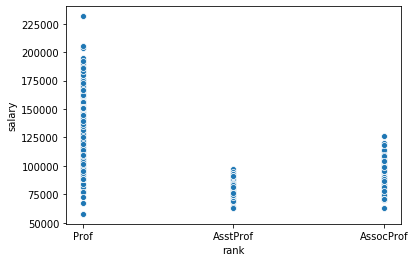

In [12]:
sns.scatterplot(x='rank',y='salary',data=df)

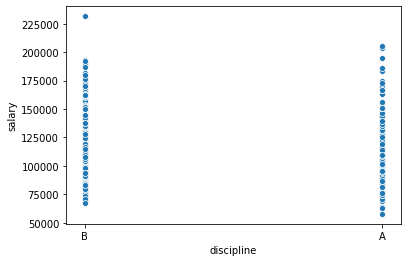

In [13]:
sns.scatterplot(x='discipline',y='salary',data=df)

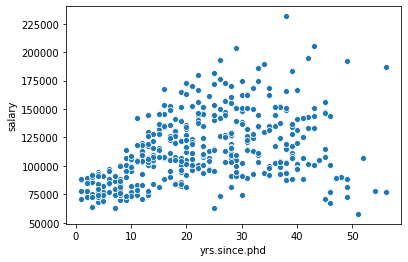

In [15]:
sns.scatterplot(x='yrs.since.phd',y='salary',data=df)

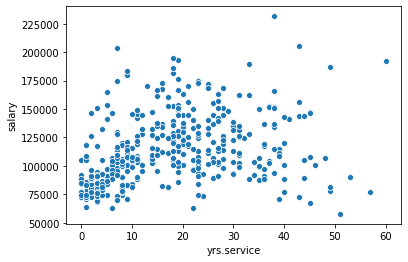

In [17]:
sns.scatterplot(x='yrs.service',y='salary',data=df)

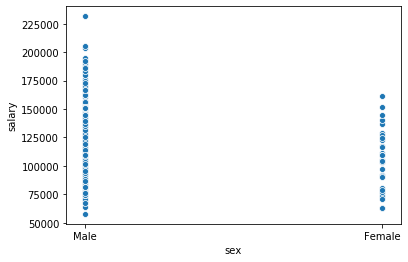

In [18]:
sns.scatterplot(x='sex',y='salary',data=df)

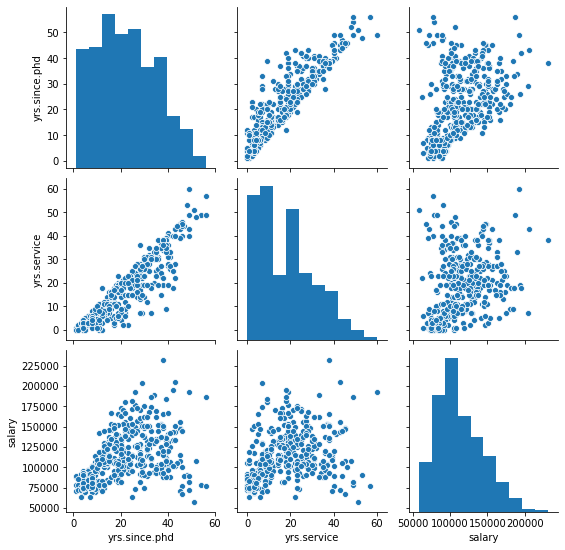

In [19]:
sns.pairplot(df)

#    Correlation

In [20]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [22]:
df.corr()['salary'].sort_values()

yrs.service      0.334745
yrs.since.phd    0.419231
salary           1.000000
Name: salary, dtype: float64

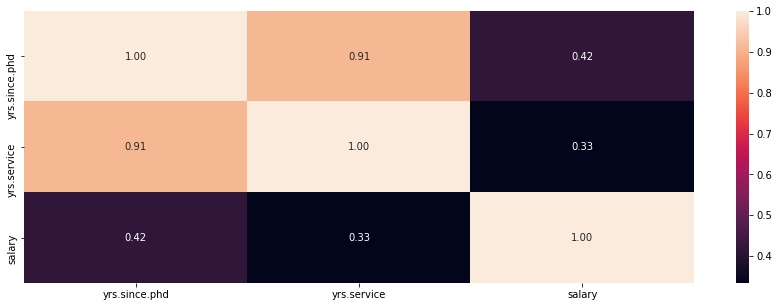

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,fmt='.2f')

# Outcome of the correlation

 All the columns of the datasets is postively correlated with the target column (Outcome)

# Descriptive Statistics

Describing data sets

In [25]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


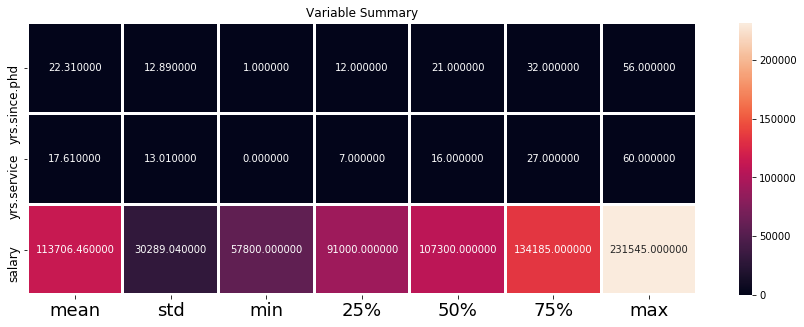

In [31]:
plt.figure(figsize=(15,5))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title('Variable Summary')
plt.show()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


# Outlier Checking

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
df1=df.drop(['rank','discipline','sex'],axis=1)
df1

,yrs.since.phd,yrs.service,salary
0,19,18,139750
1,20,16,173200
2,4,3,79750
3,45,39,115000
4,40,41,141500
...,...,...,...
392,33,30,103106
393,31,19,150564
394,42,25,101738
395,25,15,95329


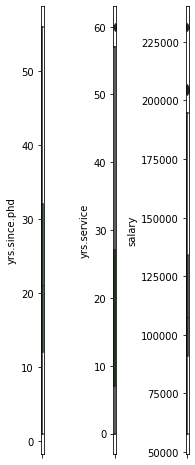

In [57]:
collist=df1.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

# Skewness

In [46]:
df.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

# Normal Distribution Curve

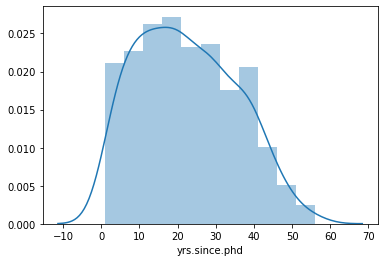

In [48]:
sns.distplot(df['yrs.since.phd'])

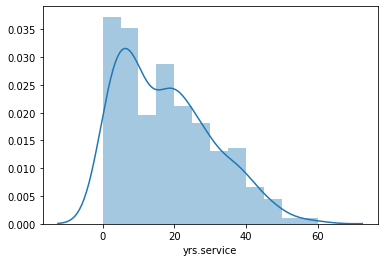

In [52]:
sns.distplot(df['yrs.service'])

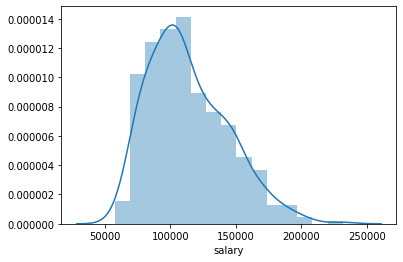

In [53]:
sns.distplot(df['salary'])

# The normal distribution shows that the data is skewed

# Data Cleaning:

In [54]:
df.corr()['salary']

yrs.since.phd    0.419231
yrs.service      0.334745
salary           1.000000
Name: salary, dtype: float64

no need to drop any columns as there is not much skewness

# Removing Outlier

In [60]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df1))#abs absolute function is like mod
z.shape

(397, 3)

In [64]:
print(np.where(z>2))

(array([  6,   7,  43,  71,  77, 125, 125, 131, 131, 161, 169, 190, 194,
       198, 249, 261, 268, 271, 276, 276, 279, 282, 282, 285, 285, 290,
       292, 298, 304, 317, 330, 330, 330, 350, 350, 350, 356, 364, 383,
       389], dtype=int64), array([2, 1, 2, 1, 2, 0, 1, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 0, 1, 1, 0,
       1, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 2, 1, 2], dtype=int64))


In [65]:
df.drop([6,   7,  43,  71,  77, 125, 125, 131, 131, 161, 169, 190, 194,
       198, 249, 261, 268, 271, 276, 276, 279, 282, 282, 285, 285, 290,
       292, 298, 304, 317, 330, 330, 330, 350, 350, 350, 356, 364, 383,
       389])

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [66]:
df_new=df[(z<2).all(axis=1)]
print('Old DataFrame',df.shape)
print('New DataFrame',df_new.shape)
print('Total Dropped Rows',df.shape[0]-df_new.shape[0])

Old DataFrame (397, 6)
New DataFrame (366, 6)
Total Dropped Rows 31


# Percentage Data Loss:

In [67]:
loss_percent=(768-716)/768*100
print(loss_percent,'%')

6.770833333333333 %


# Dividing Data in features and vectors

In [87]:
df_new1=df_new.drop(['rank','discipline','sex'],axis=1)
df_new1

,yrs.since.phd,yrs.service,salary
0,19,18,139750
1,20,16,173200
2,4,3,79750
3,45,39,115000
4,40,41,141500
...,...,...,...
392,33,30,103106
393,31,19,150564
394,42,25,101738
395,25,15,95329


In [88]:
x=df_new1.iloc[:,:-1]
y=df_new1.iloc[:,-1]

# Transforming data to remove skewness

In [89]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.02247658,  0.35407239],
       [ 0.06080119,  0.1976052 ],
       [-1.59322145, -1.25407592],
       [ 1.80473087,  1.63348163],
       [ 1.49353751,  1.73351561],
       [-1.32447652, -0.80267646],
       [ 0.14255613,  0.50182728],
       [-0.10738395,  0.35407239],
       [-0.65912955, -0.55922072],
       [-1.20149218, -1.44489806],
       [-2.09752504, -1.67461378],
       [-1.90868763, -1.98097289],
       [ 0.06080119,  0.35407239],
       [-0.65912955, -1.25407592],
       [-0.02247658,  0.50182728],
       [ 1.36497974,  1.37083992],
       [ 1.29974469,  0.70978553],
       [ 1.42956993,  1.47819609],
       [ 0.89335058,  0.90405329],
       [ 1.23384111,  1.20335886],
       [ 1.09992584,  1.14564842],
       [ 0.37958881,  0.42895317],
       [-0.56121667, -0.55922072],
       [ 0.14255613, -0.55922072],
       [ 1.16724379,  0.70978553],
       [-1.45448835, -1.25407592],
       [-0.76000762, -1.98097289],
       [-0.65912955, -0.55922072],
       [ 0.06080119,

In [102]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

# Since the target has continuos calues we will use linear regression

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import accuracy_score,mean_squared_error, mean_absolute_error

# Splitting the data frame

In [109]:
print(x.shape)
print(y.shape)

(366, 2)
(366,)


In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)
model=lr.fit(x_train,y_train)
score=lr.score(x_train,y_train)
y_pred=lr.predict(x_test)
x_pred=lr.predict(x_train)
coef=ln.coef_
intercept=ln.intercept_
print(model)
print('The salary score is : ' ,score ,'\n')
print(' Salary Predicted score: ',y_pred,'\n')
print(' expericence Predicted score: ',x_pred,'\n')
print('Actual Score :',y_test,'\n')
print('Mean absolute error :', mean_absolute_error(y_test,pred))
print('Mean squared error :' , mean_squared_error(y_test,pred))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test,pred)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
The salary score is :  0.2663147905317349 

 Salary Predicted score:  [102614.85061582  86741.55196493 130858.88390849 124914.65290041
  99965.12398065 113882.79527454 111014.99300861 118402.26943571
 109636.8970114   86570.01026202 127830.93011888 118257.0737231
 108652.34551647 101536.04480923 122310.98500084 114281.56638853
 113381.78194826 108060.60654994 105313.67349053 101597.07007088
  92274.70078447 104322.29519408 101302.06568631 105301.01384659
 124107.32303999 112728.56517008 124556.89548963 103113.71141305
 101597.07007088 120928.51683928  91605.0838478  131426.559638
 115468.21590424  96562.56140817  92274.70078447  91605.0838478
 111906.05500823 103126.42596911  87724.02989027 105968.51380138
 102373.1540537  122459.19625368 103866.98332847 114879.4894897
  92860.47572876 122265.06667583  85674.23831866  94452.7485247
  95625.53170221 120319.40265597 108060.60654994 123564.8759703
 124930.7036

# Linear Regression Graph

ValueError: x and y must be the same size

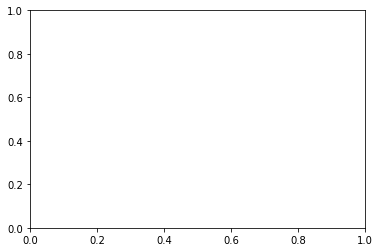

In [114]:
plt.scatter(x_train, y_train, color="green")   
plt.plot(x_train, x_pred, color="red")    
plt.title("Salary vs Experience (Training Dataset)")  
plt.xlabel("Years of Experience")  
plt.ylabel("Salary(In Rupees)")  
plt.show()

ValueError: x and y must be the same size

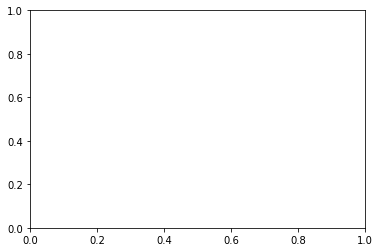

In [118]:
#visualizing the Test set results  
plt.scatter(x_test, y_test, color="blue")   
plt.plot(x_train, x_pred, color="red")    
plt.title("Salary vs Experience (Test Dataset)")  
plt.xlabel("Years of Experience")  
plt.ylabel("Salary(In Rupees)")  
plt.show()  